# Customer churn in telecommunications company: case study

## Abstract

The following case study has the aim to analyse the sample data set available on [IBM Watson website (Guide to Sample Data Sets)](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/) and bring insights based on this research. The data set contains data on churn in a given telecommunication company. In this case study, we will derive main characteristics distinguishing churning and non-churning clients. This notebook will guide the reader through important analytical steps in order to answer business questions in regards to churn and also highlight the findings derived from every step of the analysis.

### Goal and scope of the analysis

Customer churn is an important issue for any business, since it directly impacts companies' market share and their profitability. Predicting churn and understanding how to work with clients who are about to churn reveal substantial benefits, as it allows to prolong the customer lifetime and increase their value. With this goal in mind, we will mine data for insights to define the patterns shared by churning customers and help the reader understand better what might be a reason for the churn.

Based on the information we have, we'll focus primarily on giving insights about the following questions: 
1. When do clients churn? 
2. Who are the churning clients and how different are they from those who don't churn? 

In regards to the second question we'll split the client base into various segments and analyse three extreme profiles to find out any similarities between churning clients and their distinctive features. Also, we will attempt to describe customers who are staying for very long time with the same company and who are not prone to churn. Hence, we will analyse in particular, the following segments:
- Clients who have the longest tenure and didn't churn yet
- Clients who stayed a long time with the company and eventually churned
- Clients who churned quickly


## Data set description

We have the client data of one telecommunication company found among [Sample Data Sets on IBM Watson website](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/). The dataset has 7043 rows, each belonging to a single client, and 21 columns describing demographic characteristics of the customers, services enabled, contract and payment information and  churn status. 


## 1. Research and Analysis 

### 1.1. Data loading and preprocessing 

Before digging into the analysis, we need to load the data and see what it consists of. We also need to make sure that the formatting of the data is suitable for our analysis. 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="ticks", context='talk', font='monospace')
%matplotlib inline

df=pd.read_csv("../Telco_churn_data.csv")
df.head(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As we see, some columns have values "1" / "0" instead of "Yes" / "No" or any other inconsistent formats. We'll unify the formats of such values to make them viewer-friendly for the plots following later in this research. After that we will start addressing the research questions of this case study.

In [39]:
df.SeniorCitizen.replace([1, 0], ['Senior', 'Non-senior'], inplace=True)
df.Dependents.replace(['Yes', 'No'], ['Dependents', 'No dependents'], inplace=True)
df.Partner.replace(['Yes', 'No'], ['Partner', 'No partner'], inplace=True)
df = df.rename(columns={'gender': 'Gender', 'Dependents': 'Family status', 'SeniorCitizen': 'Seniority', 'Partner': 'Relationship status'})

## Research question 1: When do clients churn? 

To describe visually the time when clients churn, we'll create a new dataframe of clients who churned and build a histogram of their tenure in the company.

In [40]:
churning_clients = pd.DataFrame(df[df['Churn'] == 'Yes'])

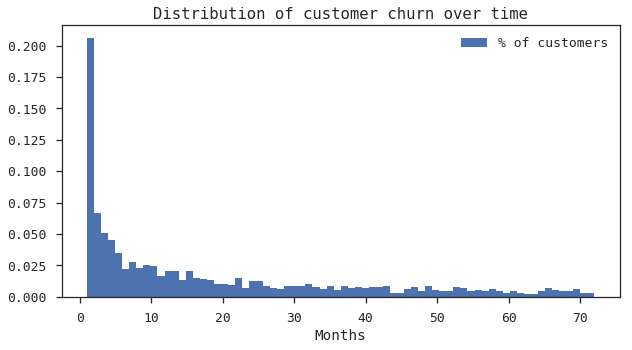

In [97]:
plt.figure(figsize=(10, 5))

plt.hist(churning_clients['tenure'], normed=True, bins = 72, label='% of customers') 
plt.legend()
plt.title('Distribution of customer churn over time')
plt.xlabel('Months') ;

We can see from the histogram that the clients tend to churn in the beginning of their journey with the company. It can be an indicator that the expectations regarding the company service were not met. The churn rates are the highest within the first 10 months and then gradually flatten. Let's find how many clients churned during each of the first 5 months.

In [42]:
tenure = pd.DataFrame(churning_clients['tenure'].value_counts())
tenure.sort_index(inplace=True)
tenure.columns = ['Number of clients']
tenure.head(n=5)

,Number of clients
1,380
2,123
3,94
4,83
5,64


The first month is when the vast majority of churning clients decide to quit the company. 

To get a full pucture of client churn over longer time, we'll use intervals of 12 months and build a barplot observing how clients churn year by year.

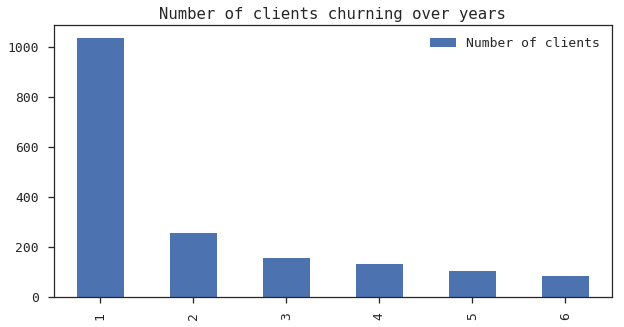

In [43]:
grouped_tenure = pd.DataFrame([tenure.iloc[0:12].sum(), 
                               tenure.iloc[13:24].sum(), 
                               tenure.iloc[25:36].sum(), 
                               tenure.iloc[37:48].sum(),
                               tenure.iloc[49:60].sum(),
                               tenure.iloc[61:72].sum()])
new_index = ['1', '2', '3', '4', '5', '6']
grouped_tenure.index = new_index 
grouped_tenure.plot.bar(figsize=(10, 5), title='Number of clients churning over years');

The churn rate over time falls dramatically: from a thousand of clients churning in their first year to less than a hundred in their 6th year. 

### Tenure of current clients

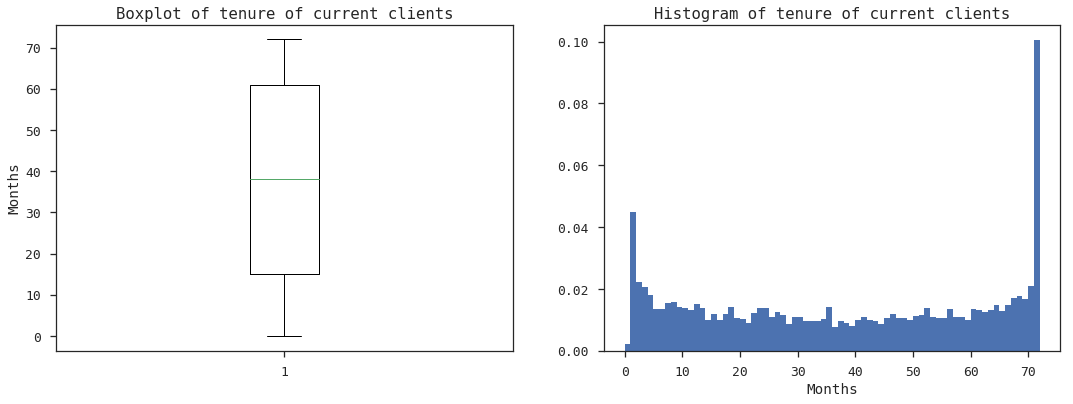

In [85]:
non_churning_clients = pd.DataFrame(df[df['Churn'] == 'No'])
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.boxplot(non_churning_clients['tenure'])
plt.title('Boxplot of tenure of current clients')
plt.ylabel('Months')

plt.subplot(1, 2, 2)
plt.hist(non_churning_clients['tenure'], bins=72, normed=True)
plt.title('Histogram of tenure of current clients')
plt.xlabel('Months')

plt.show() 

The tenure of the current customers is spread almost evenly across the time period with two peaks in the beginning and at the end. We can infer that the company has evenly retained clients over time. The peak at the end of the graph can be explained either by the fact that the first clients were very loyal and didn't churn or probably that many more clients joined the company at its start.

Let's now look into factors that could help predict if a client is more likely to churn or to stay with the company. We'll compare demographic characteristics and usage patters of churning and non-churning clients, and then analyse  specific extreme segments of clients, evaluating also their churn status.

## Research question 2: Who are the churning clients and how different are they from non-churning ones?

### Difference among churning and non-churning clients: general trends

In this section we'll look for any significant defference between churners and non-churners in terms of who they are, what services they use, how they spend money on and pay for telecommunication services. 

We'll start with demographics: 

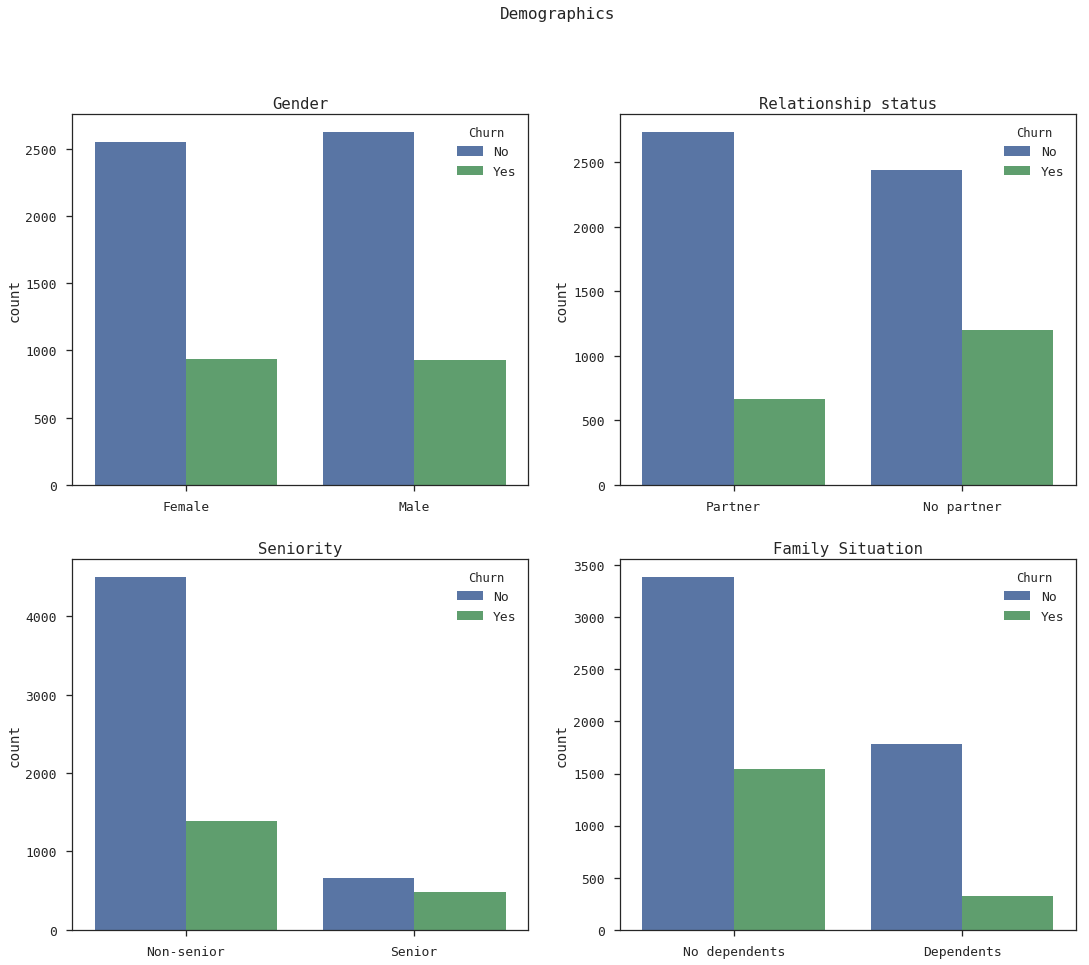

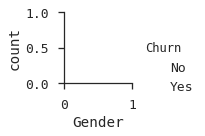

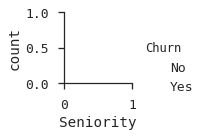

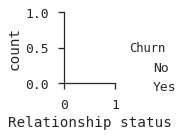

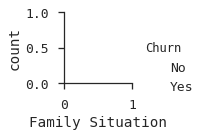

In [87]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
fig.suptitle('Demographics', fontsize = 16) 
num_plot = 0
columns = df.columns[1:3]
for column in columns: 
    sb.factorplot(data=df, x=column, hue='Churn', kind='count', ax=ax[num_plot][0], size=2)
    ax[num_plot][0].set_title(column)
    ax[num_plot][0].set_xlabel('')
    num_plot+=1

num_plot = 0   
columns = df.columns[3:5]
for column in columns: 
    sb.factorplot(data=df, x=column, hue='Churn', kind='count', ax=ax[num_plot][1], size=2)
    ax[num_plot][1].set_title(column)
    ax[num_plot][1].set_xlabel('')
    num_plot+=1

Comparing the visible differences for both groups we can conlude that: 
1. gender doesn't help predict the possibility of churn since the groups are almost equal
2. clients who tend to churn are: senior, without partners and without dependents

Now we will conduct the analysis on services enabled for churning and non-churning clients. We will not run the analysis for all the columns in this notebook, but you can find the code that is be used to costruct all the plots here: 

The most interesting plots of the services used by churning clients and by those who are not:

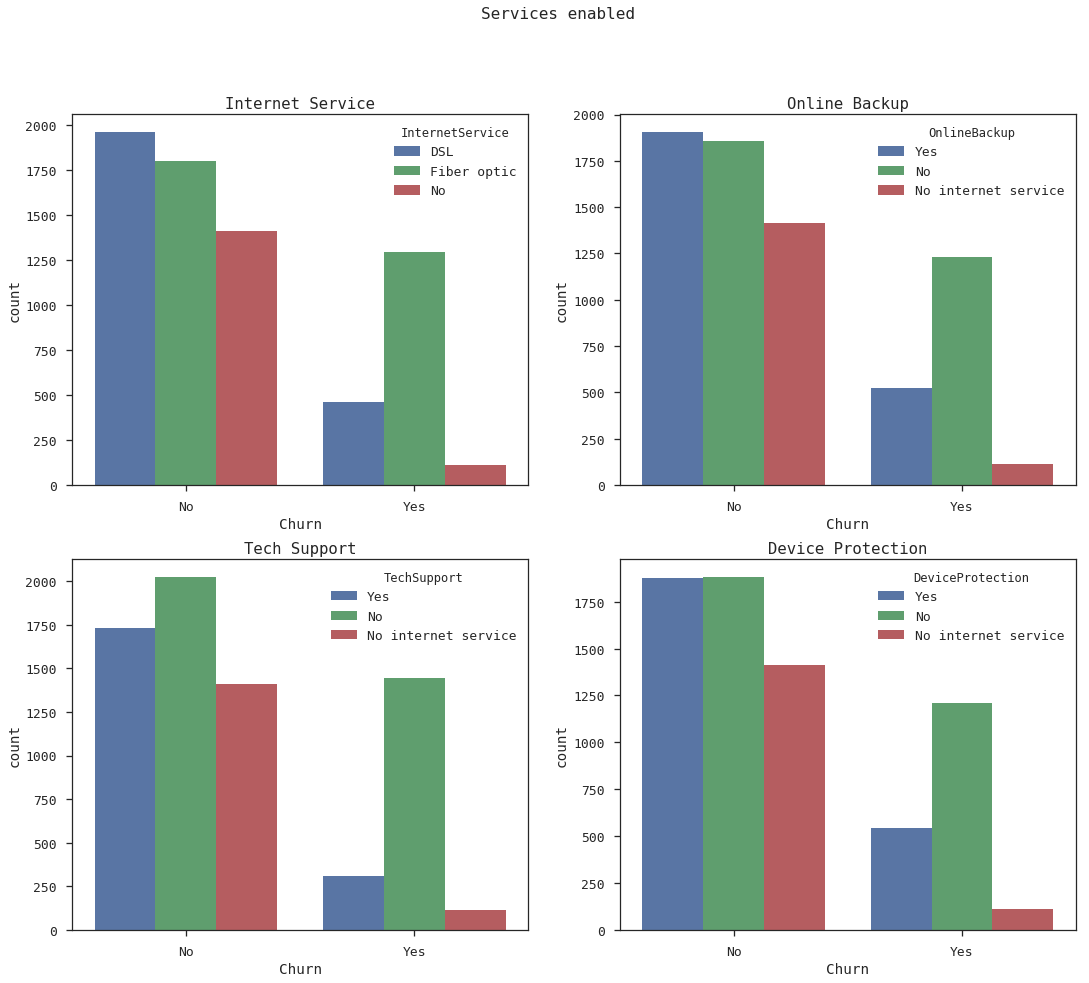

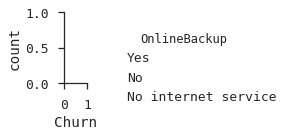

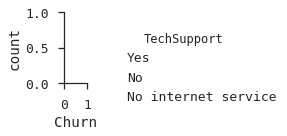

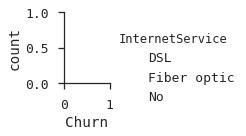

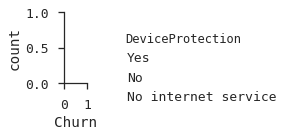

In [104]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
fig.suptitle('Services enabled', fontsize = 16) 
sb.factorplot(data=df, x='Churn', hue='OnlineBackup', kind='count', ax=ax[0][1], size=2, hue_order = ['Yes', 'No', 'No internet service'])
ax[0][1].set_title('Online Backup')
sb.factorplot(data=df, x='Churn', hue='TechSupport', kind='count', ax=ax[1][0], size=2, hue_order = ['Yes', 'No', 'No internet service'])
ax[1][0].set_title('Tech Support')
sb.factorplot(data=df, x='Churn', hue='InternetService', kind='count', ax=ax[0][0], size=2)
ax[0][0].set_title('Internet Service')
sb.factorplot(data=df, x='Churn', hue='DeviceProtection', kind='count', ax=ax[1][1], size=2, hue_order = ['Yes', 'No', 'No internet service'])
ax[1][1].set_title('Device Protection');

The main diffences observed from the plots help us conlude that churning clients: 
- Use fiber optic as a mean of internet service
- Don't use online backup, technical support or data protection

Now we'd like to see how both groups pay for the services and how much: 

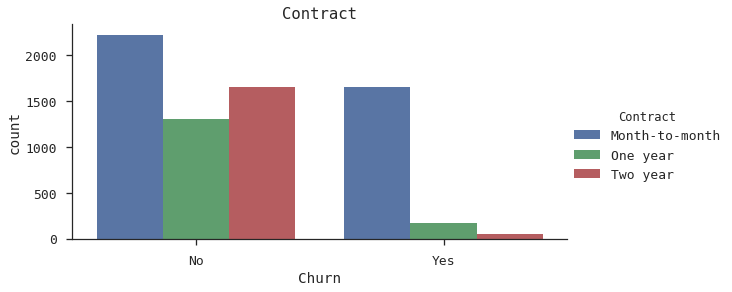

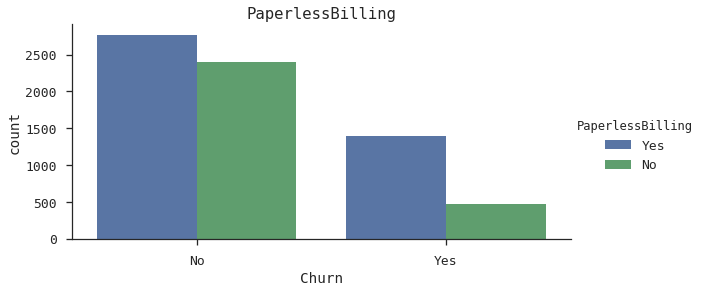

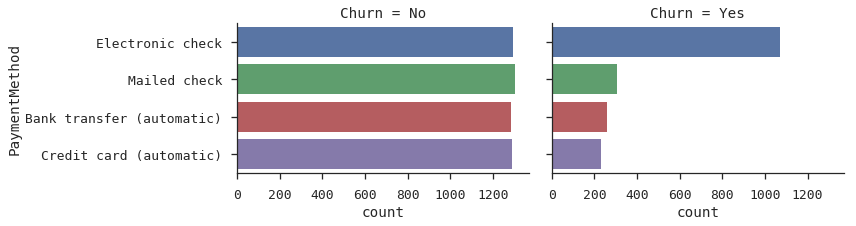

In [92]:
plots = df.columns[15:17]

for plot in plots: 
    sb.factorplot(data=df, x='Churn', hue=plot, kind='count', size=4, aspect=2)
    sb.plt.title(plot)
    
sb.factorplot(data=df, y='PaymentMethod', col='Churn', kind='count', size=3, aspect=2);

The analysis of the graphs above reflects the expected results: 
- Clients with Month-to-month contract are more prone to churn. Generally "Pay-as-you-use" contracts are easy to terminate and, therefore, the customers don't have high barriers to switch. 
- The predominance of usage of paperless billing and electronic checks by churning clients also can mean that these people are mobile, dynamic and probably are curious to try another service. Taking into account that these payment methods allow customers not to wait for the delivery of the bill or transfer, they can quit faster and with ease.

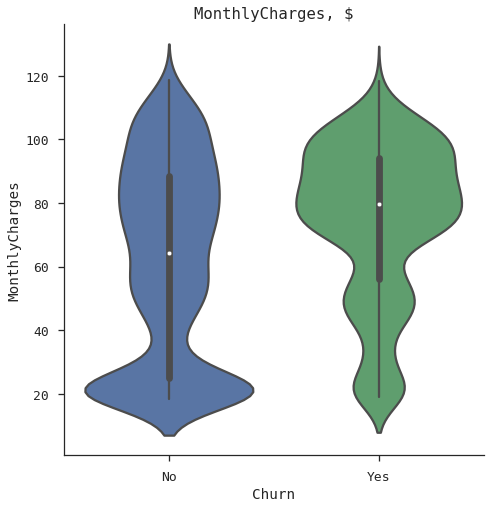

In [89]:
sb.factorplot(data=df, x='Churn', y='MonthlyCharges', kind='violin', size=7, aspect=1)
sb.plt.title('MonthlyCharges, $');

The monthly charges demonstrate an interesting trend: 
- Churning clients tend to be more valuable for the company in terms of their expenditure and they spend more than those who stay, potentially using the services more intensively.  

The future investigation can include the analysis on whether the company attract the right target audience of their business and if the message of the marketing campaigns reflect the reality of how the services are provided. 

##  Difference in services consumption among churning and not churning clients: edge cases analysis

Now we'll compare 3 extreme segments: 
- Clients who are not churning and have the longest tenure (upper 25% of tenure of current clients)
- Clients who stayed long with company and eventually churned (upper 25% of tenure of churned clients)
- Clients who churned quickly (lower 25% of tenure of churned clients)

For edge cases, we're more interested to see any noticeble difference in how they use services, since that's something the company has the direct influence on.

In [50]:
non_churning_clients['tenure'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [51]:
churning_clients['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [52]:
long_non_churning_clients = pd.DataFrame(non_churning_clients[non_churning_clients["tenure"] > 61])
long_churning_clients = pd.DataFrame(churning_clients[churning_clients["tenure"] > 26])
quickly_churning_clients = pd.DataFrame(churning_clients[churning_clients["tenure"] <= 2])
segments = [long_non_churning_clients, long_churning_clients, quickly_churning_clients]

The most two interesting trends that were found are: 
1. If we look closer at Online Security and Tech Support services, we see that the propotion of people who use them raise drastically from quick churners, who tend not to use them, to long living non-churners, who in the opposite, castly use them. The important observation here is that the majoprity of churners, who stayed with the compamny for longer didn't use these services much, whereas non-churners do use them. The usage of these two services could be the most powerful criteria to identify the most long-term clients, who will stay with the company. 

2. If we examine the usage of Online Backup, Data Protection, Streaming TV and Streaming Movies services by these extreme segments, we see that the loyal customers who stayed longer have these services enabled. However, in contrary to the first trend, they don't allow us draw any distinction between churners and non-churners.

The illustrations of these two trends: 

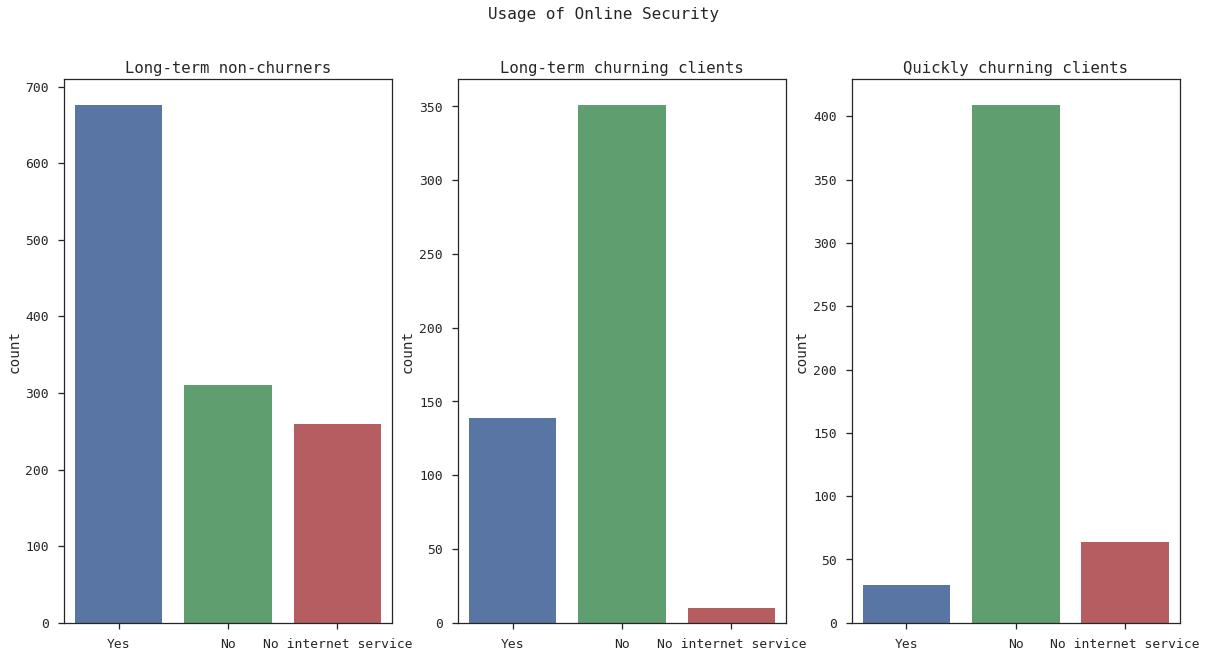

In [53]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle('Usage of Online Security', fontsize = 16)
title_plot = ['Long-term non-churning clients', 'Long-term churning clients', 'Quickly churning clients']
num_plot = 0
for segment in segments:
    sb.countplot(segment['OnlineSecurity'], ax=ax[num_plot], order=['Yes', 'No', 'No internet service'])
    ax[num_plot].set_title(title_plot[num_plot])
    ax[num_plot].set_xlabel('')
    num_plot+=1

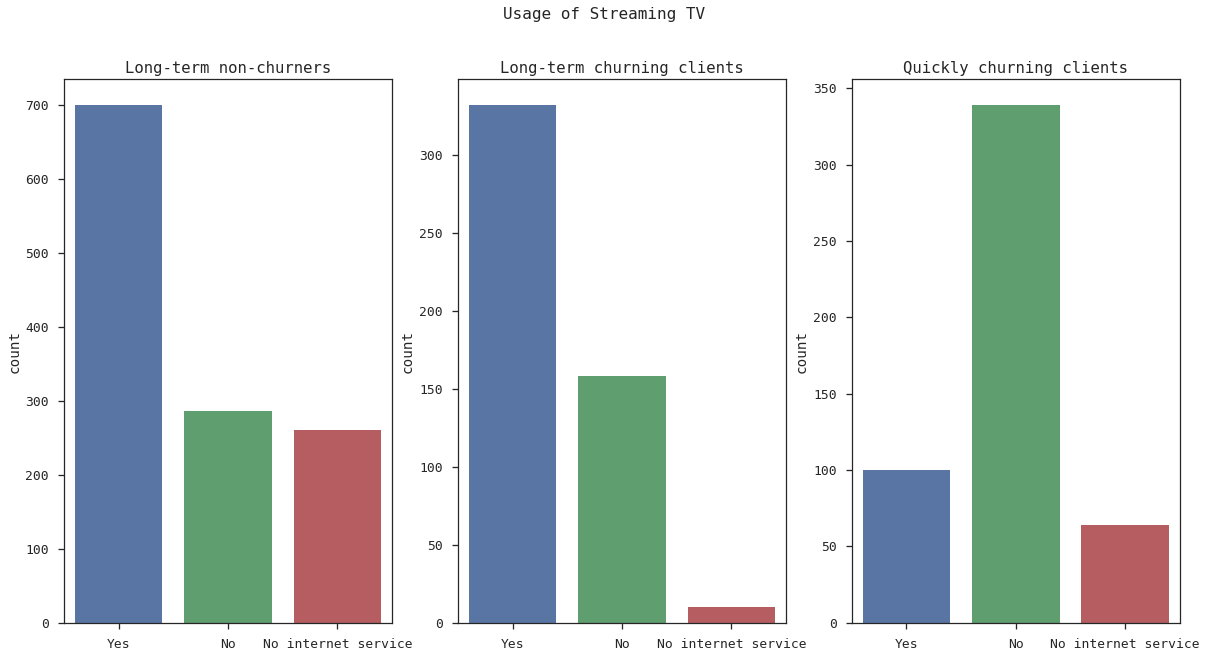

In [54]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle('Usage of Streaming TV', fontsize = 16)
title_plot = ['Long-term non-churning clients', 'Long-term churning clients', 'Quickly churning clients']
num_plot = 0
for segment in segments:
    sb.countplot(segment['StreamingTV'], ax=ax[num_plot], order=['Yes', 'No', 'No internet service'])
    ax[num_plot].set_title(title_plot[num_plot])
    ax[num_plot].set_xlabel('')
    num_plot+=1

## Possible further research

### Limitations 

There are limitations of the analisys that are imposed by data. Since there're no timestamps of events in the life of clients, we cannot definitely say when a client churned. Thus, we might have clients who churned for different reasons at a different period of time and due to different cultural or economic reasons. Also, we don't have the data on the satisfaction of a client and, thus, we cannot tell if a client, who didn't churn yet, is going to stay with the company for longer. 

If the data set would have included the information about competitor or services that the churned client used after they switched, the results of the analysis would have been more fruitful. In this case, it could have been possible to identify the source of churn up to a particular service that the client wanted to have or was dissatisfied with. 

Unfortunately, we don't have the information on the region where the data was gathered. The insights of the analysis could be extensively used to characterise the telecom market in a particular location and serve as a basis for further recommendations to telecom companies in that region. 

### Other areas of research that can be done on this data

The dataset can be used to identify customer segments who are prone to churn, as well as to get the understanding of how various groups of customers use telecommuntication services. Also, this data can be used to identify the services that bring more monetary value to the company, for example clients who tend to have the highest bills. Using this data the company can identify the profile AAA clients and find the areas for improvement to serve these top clients better. 